# Importing libraries

In [35]:
import numpy as np 
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# PREPROCESSING

In [8]:
#Loads the data in pandas dataframe
data=pd.read_csv('/kaggle/input/datath/data.csv')
#Display data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
#Detecting Missing Values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
#drop the column that contains NaN
data=data.dropna(axis = "columns")
#Verify that there is no more NaN values
data.isnull().sum().sum()

0

In [11]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [13]:
pd.DataFrame(data['diagnosis'].value_counts())

,count
diagnosis,
B,357
M,212


In [14]:
data = data.replace({'diagnosis':{'B':0, 'M':1}})
pd.DataFrame(data['diagnosis'].value_counts())

,count
diagnosis,
0,357
1,212


In [31]:
#feature scaling
scaler = MinMaxScaler()
selected_columns = data.columns[data.max() != 1]
data[selected_columns] = scaler.fit_transform(data[selected_columns])
data.head()

#remove outliers
z_scores = stats.zscore(data)
data_no_outliers = data[(z_scores < 3).all(axis=1)]

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


<Axes: >

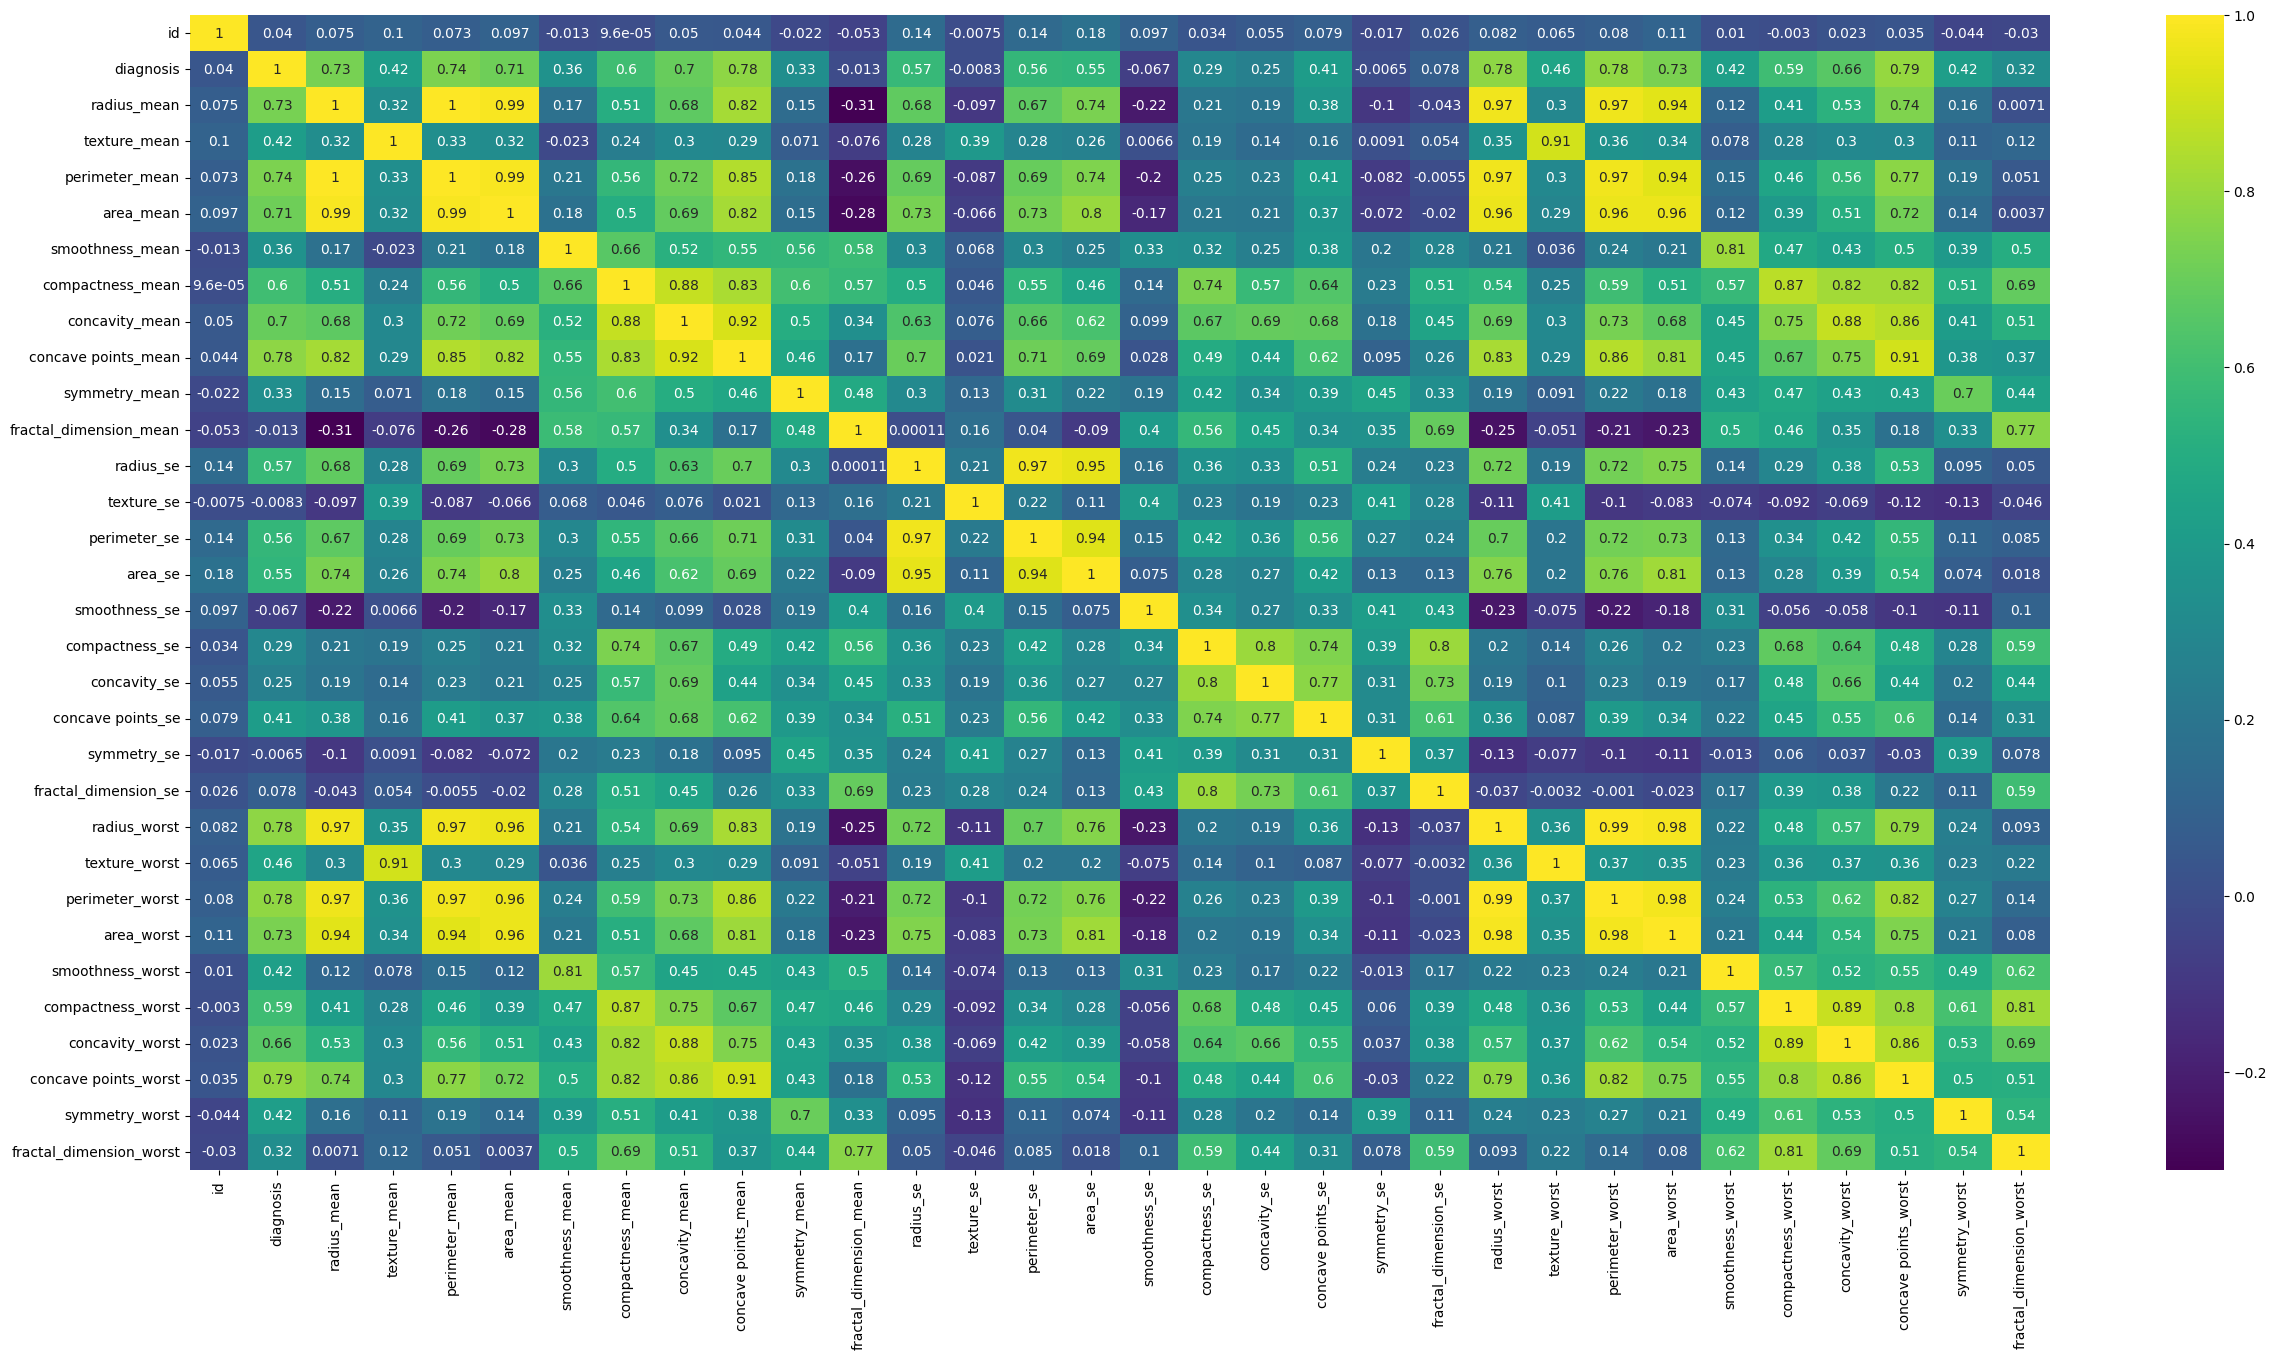

In [34]:
correlation = data.corr()
fig, ax = plt.subplots(figsize=(30,15)) 
clr=sns.color_palette("viridis", as_cmap=True)
sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns,
        cmap=clr,
        annot=True)

In [17]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [40]:
x=data.drop(['id','diagnosis'],axis=1).values
y = data['diagnosis'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=0) 

In [41]:
#building our logistic model
modele = LogisticRegression() 
#fitting training data
modele.fit(x_train, y_train)
#predicting  output
pred=modele.predict(x_test)
#score 
modele.score(x_test, y_test)

0.9824561403508771

In [64]:
knn = KNeighborsClassifier(n_neighbors=3) #knn model
knn.fit(x_train,y_train)  # Training the model
y_pred = knn.predict(x_test)   #Predict output


print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 5)}") 
print(f"Precision: {round(precision_score(y_test, y_pred), 5)}")
print(f"Recall: {round(recall_score(y_test, y_pred), 5)}")
print(f"F1_score: {round(f1_score(y_test, y_pred), 5)}")

Accuracy: 0.98246
Precision: 1.0
Recall: 0.95455
F1_score: 0.97674


In [47]:
#decision tree model
DT = DecisionTreeClassifier() 

#fitting model
DT.fit(x_train, y_train)   

#predicting output
predictions = DT.predict(x_test)   

#Score
print(f"Accuracy: {round(accuracy_score(y_test, predictions), 5)}") 
print(f"Precision: {round(precision_score(y_test, predictions), 5)}")
print(f"Recall: {round(recall_score(y_test, predictions), 5)}")
print(f"F1_score: {round(f1_score(y_test, predictions), 5)}")

Accuracy: 0.92982
Precision: 0.875
Recall: 0.95455
F1_score: 0.91304


In [46]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)

print(f"Accuracy: {round(accuracy_score(y_test, pred), 5)}") 
print(f"Precision: {round(precision_score(y_test, pred), 5)}")
print(f"Recall: {round(recall_score(y_test, pred), 5)}")
print(f"F1_score: {round(f1_score(y_test, pred), 5)}")

Accuracy: 0.96491
Precision: 0.91667
Recall: 1.0
F1_score: 0.95652


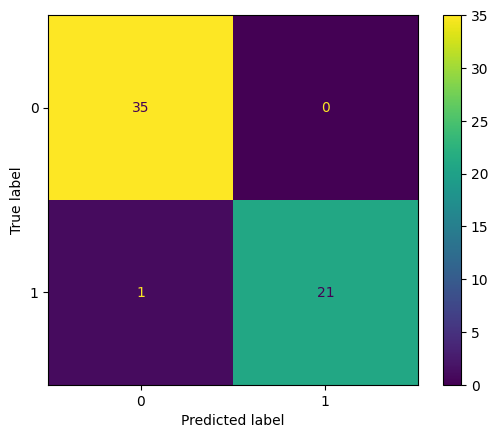

In [23]:
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV,KFold
kf=KFold(n_splits=5,shuffle=True,random_state=40)
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}
knn = KNeighborsClassifier()
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kf)
# Fit the GridSearchCV to your data
grid_search.fit(x_train, y_train)  # Replace X and y with your data
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [26]:
knn = KNeighborsClassifier(**best_params)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)  

print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 5)}") 
print(f"Precision: {round(precision_score(y_test, y_pred), 5)}")
print(f"Recall: {round(recall_score(y_test, y_pred), 5)}")
print(f"F1_score: {round(f1_score(y_test, y_pred), 5)}")

Accuracy: 0.96491
Precision: 0.95455
Recall: 0.95455
F1_score: 0.95455


In [49]:
from sklearn.model_selection import RandomizedSearchCV,KFold
kf=KFold(n_splits=5,shuffle=True,random_state=40)
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}
knn = KNeighborsClassifier()
# Create a GridSearchCV object
random_search = RandomizedSearchCV(knn, param_grid, cv=kf)
# Fit the GridSearchCV to your data
random_search.fit(x_train, y_train)  # Replace X and y with your data
# Get the best hyperparameters and the best model
best_params_random = random_search.best_params_
print("Best Parameters:", best_params_random)

Best Parameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 7, 'algorithm': 'kd_tree'}


In [28]:
knn = KNeighborsClassifier(**best_params_random)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)  

print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 5)}") 
print(f"Precision: {round(precision_score(y_test, y_pred), 5)}")
print(f"Recall: {round(recall_score(y_test, y_pred), 5)}")
print(f"F1_score: {round(f1_score(y_test, y_pred), 5)}")

Accuracy: 0.96491
Precision: 0.95455
Recall: 0.95455
F1_score: 0.95455


In [29]:
# Define the hyperparameter grid
kf=KFold(n_splits=5,shuffle=True,random_state=40)
param_grid = {
    'n_estimators': range(100,500,100),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt',None],
    'bootstrap': [True, False]
}
RF=RandomForestClassifier()
random_search = RandomizedSearchCV(RF, param_grid, cv=kf)
random_search.fit(x_train, y_train) 
best_params_ = random_search.best_params_
print("Best Parameters:", best_params_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'log_loss', 'bootstrap': False}


In [30]:
rf_model = RandomForestClassifier(**best_params_)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)  

print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 5)}") 
print(f"Precision: {round(precision_score(y_test, y_pred), 5)}")
print(f"Recall: {round(recall_score(y_test, y_pred), 5)}")
print(f"F1_score: {round(f1_score(y_test, y_pred), 5)}")

Accuracy: 0.98246
Precision: 0.95652
Recall: 1.0
F1_score: 0.97778
